In [2]:
print('''DETETECTION OF EARLY MENTAL HEALTH DISORDERS USING EXPLAINABLE ML APPROACH''')
print('Dataset: cleaned_combined_data.csv')

DETETECTION OF EARLY MENTAL HEALTH DISORDERS USING EXPLAINABLE ML APPROACH
Dataset: cleaned_combined_data.csv


In [3]:
%pip install matplotlib seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('../data/processed/cleaned_combined_data.csv', encoding='latin1')
df.head()

title  \
0         New rule: Blur pictures of drugs   
1              The chatroom is open again!   
2                           Am I addicted?   
3                        Addiction Help :)   
4  i've spent the entire week getting high   

                                                text  subreddit   category  \
0  A new rule has been added: Blur pictures of dr...  addiction  addiction   
1  The chatroom has been opened again! It got del...  addiction  addiction   
2  My husband started me on cocaine 7 years ago, ...  addiction  addiction   
3  Hi everyone, I know that it might seem insigni...  addiction  addiction   
4  i don't have motivation to do anything else. a...  addiction  addiction   

       label     created_ist  \
0  addiction  5/19/2025 7:17   
1  addiction  5/19/2025 7:38   
2  addiction  8/15/2025 9:56   
3  addiction  8/15/2025 8:10   
4  addiction  8/15/2025 2:35   

                                       combined_text  
0  New rule: Blur pictures of drugs A new rule ha...  
1  The chatroom is open again! The chatroom has b...  
2  Am I addicted? My husband started me on cocain...  
3  Addiction Help :) Hi everyone, I know that it ...  
4  i've spent the entire week getting high i don'...

In [8]:
df.to_csv('../data/processed/cleaned_combined_data_utf8.csv', index=False, encoding='utf-8')

In [9]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12482 entries, 0 to 12481
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          12482 non-null  object
 1   text           12473 non-null  object
 2   subreddit      12482 non-null  object
 3   category       12482 non-null  object
 4   label          12482 non-null  object
 5   created_ist    12482 non-null  object
 6   combined_text  12482 non-null  object
dtypes: object(7)
memory usage: 682.7+ KB


title   text subreddit category    label      created_ist  \
count   12482  12473     12482    12482    12482            12482   
unique  12194  12418        16       11       11             9823   
top      Help  Title      ptsd  anxiety  anxiety  8/13/2025 20:59   
freq       19      3       995     1988     1988                6   

                                            combined_text  
count                                               12482  
unique                                              12467  
top     Daily Positivity & HA Journey Progress Updates...  
freq                                                    3

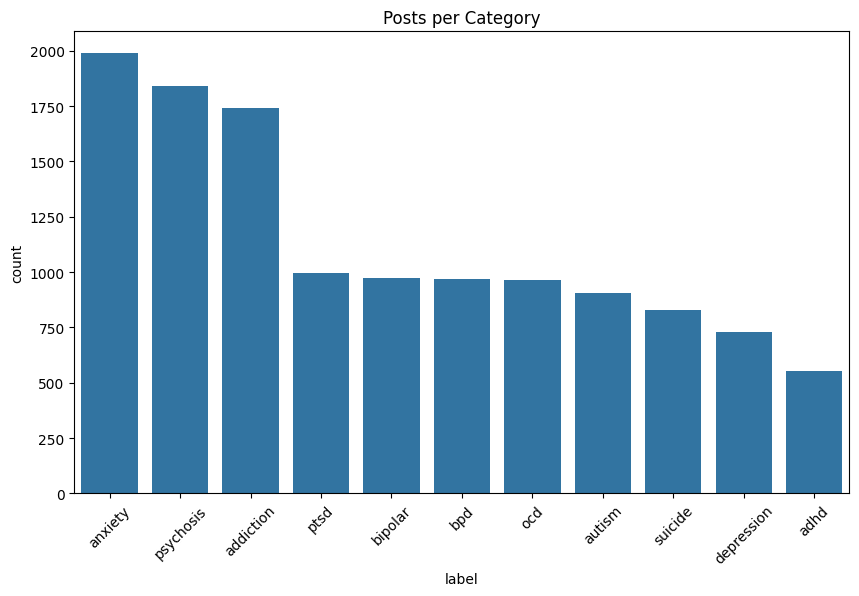

label
anxiety       15.926935
psychosis     14.757250
addiction     13.948085
ptsd           7.971479
bipolar        7.803237
bpd            7.755167
ocd            7.715110
autism         7.234418
suicide        6.633552
depression     5.824387
adhd           4.430380
Name: proportion, dtype: float64

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Posts per Category")
plt.show()

df['label'].value_counts(normalize=True) * 100

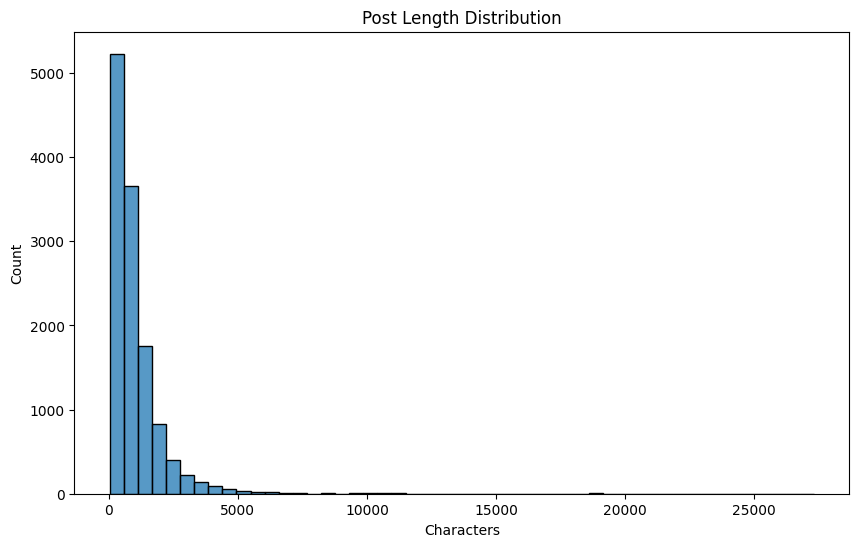

count         mean          std    min    25%    50%      75%  \
label                                                                        
addiction   1742.0  1004.376579  1147.896063   37.0  368.0  693.5  1246.75   
adhd         553.0   922.985533   464.030437  300.0  538.0  824.0  1192.00   
anxiety     1989.0   961.451483   864.454232   32.0  426.0  730.0  1183.00   
autism       903.0  1034.722038  1395.610782   45.0  370.5  706.0  1238.50   
bipolar      974.0   797.896304   835.529170   62.0  309.0  557.0  1026.00   
bpd          968.0  1199.668388   924.316986  204.0  541.0  928.5  1597.25   
depression   727.0   975.121045   965.528926   43.0  372.0  707.0  1291.50   
ocd          963.0   936.111111   880.914971   63.0  366.5  652.0  1203.50   
psychosis   1842.0   943.186211  1542.297844   34.0  274.0  541.0  1074.75   
ptsd         995.0  1350.930653  1521.333985   40.0  506.0  944.0  1629.00   
suicide      830.0   780.018072   873.884577   31.0  244.0  514.5  1017.25   

                max  
label                
addiction   22861.0  
adhd         2082.0  
anxiety     11165.0  
autism      17982.0  
bipolar      9706.0  
bpd          6598.0  
depression  10379.0  
ocd          7043.0  
psychosis   27330.0  
ptsd        18840.0  
suicide     10732.0

In [13]:
df['text_length'] = df['combined_text'].str.len()

plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50)
plt.title("Post Length Distribution")
plt.xlabel("Characters")
plt.show()

df.groupby('label')['text_length'].describe()

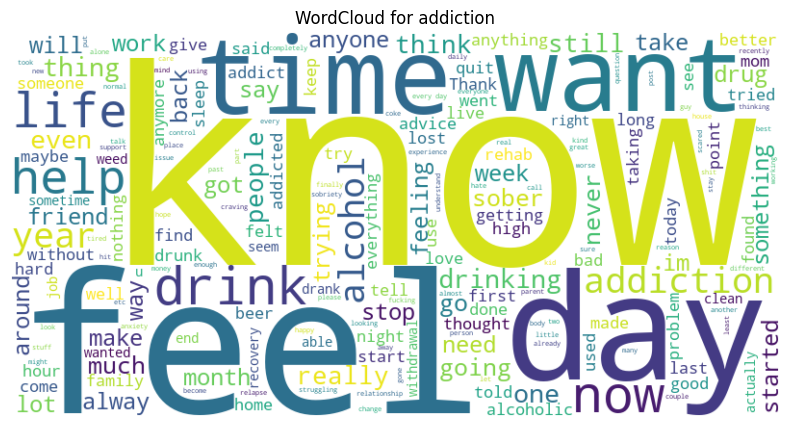

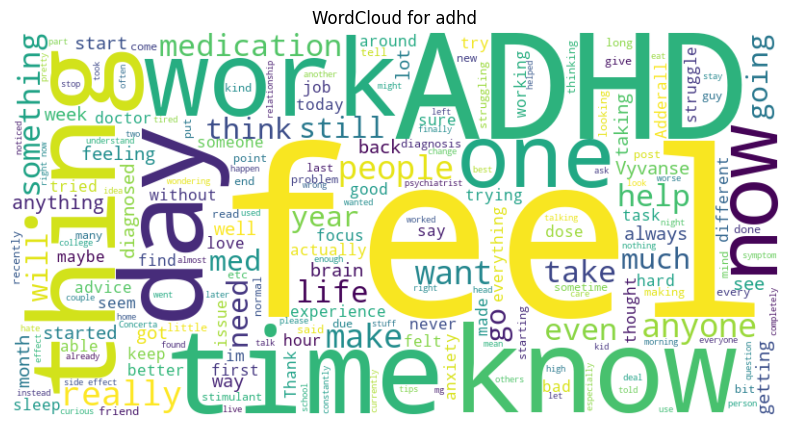

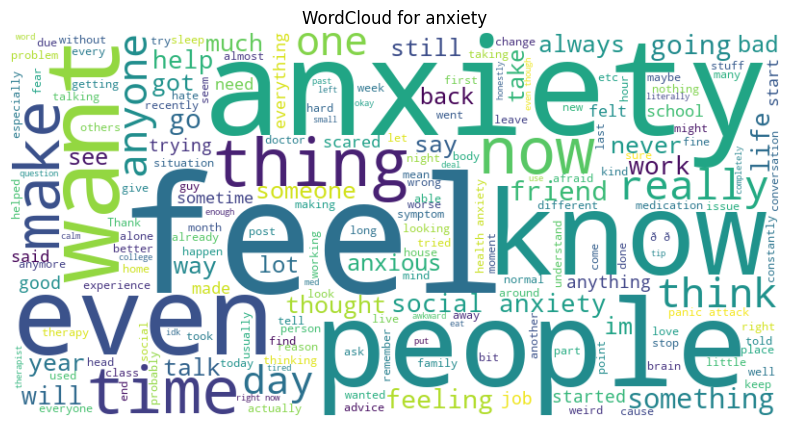

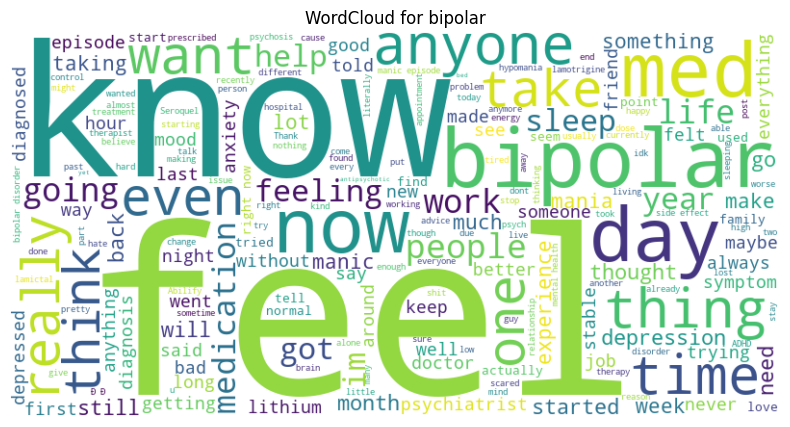

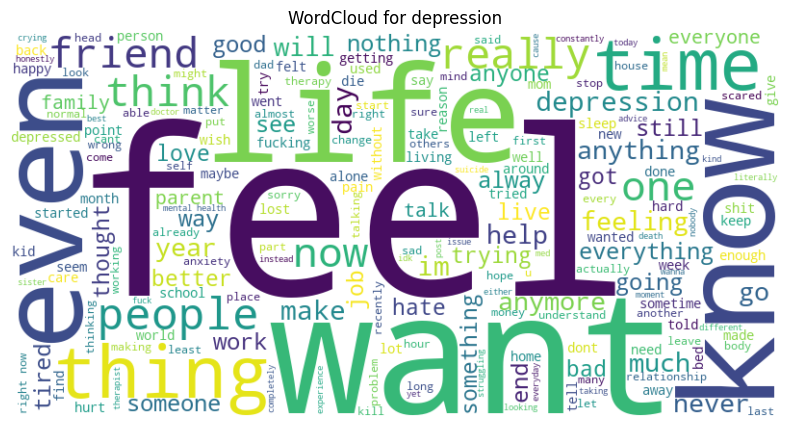

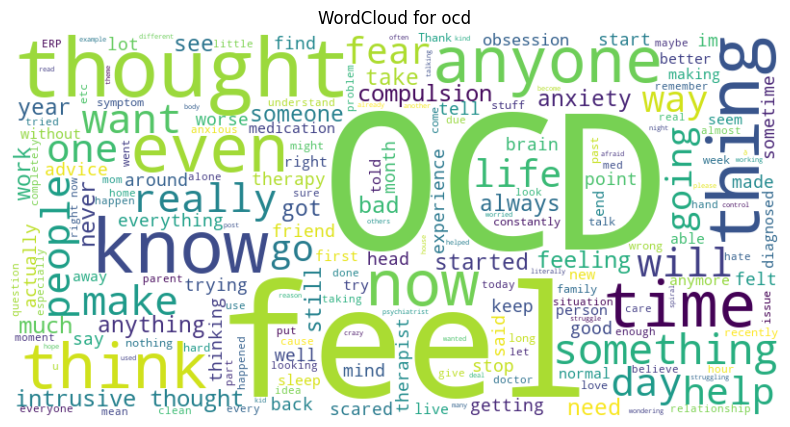

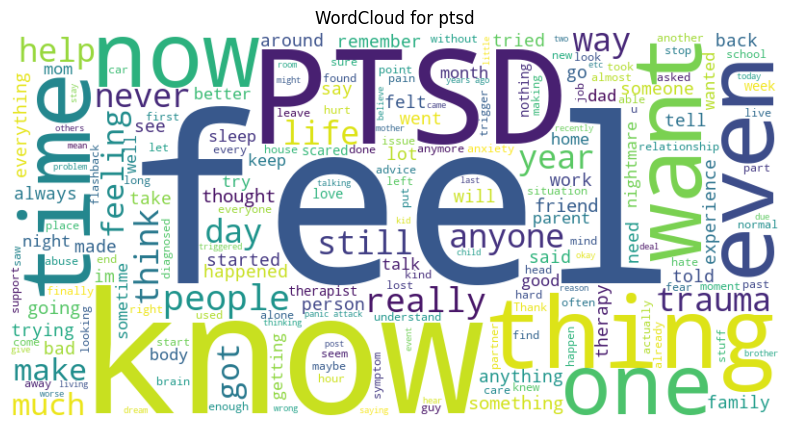

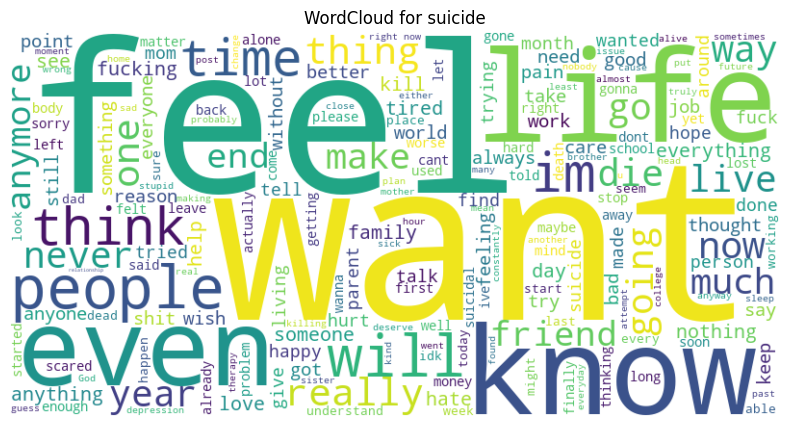

In [11]:
for category in df['label'].unique():
    text = " ".join(df[df['label']==category]['combined_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {category}")
    plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
for category in df['label'].unique():
    texts = df[df['label']==category]['combined_text']
    X = vectorizer.fit_transform(texts)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]
    print(f"Top bigrams for {category}: {words_freq}")

Top bigrams for addiction: [('feel like', 367), ('don know', 356), ('don want', 208), ('feels like', 103), ('years ago', 93), ('days sober', 89), ('just want', 80), ('felt like', 76), ('cold turkey', 75), ('mental health', 75)]
Top bigrams for adhd: [('feel like', 172), ('don know', 79), ('feels like', 48), ('diagnosed adhd', 44), ('years ago', 32), ('don want', 27), ('ve tried', 26), ('felt like', 23), ('got diagnosed', 23), ('adderall xr', 23)]
Top bigrams for anxiety: [('feel like', 745), ('social anxiety', 595), ('don know', 410), ('health anxiety', 225), ('don want', 186), ('feels like', 174), ('panic attack', 167), ('panic attacks', 162), ('felt like', 113), ('just want', 110)]
Top bigrams for autism: [('feel like', 227), ('don know', 188), ('don want', 87), ('feels like', 59), ('autistic people', 55), ('don understand', 44), ('don like', 41), ('just feel', 38), ('didn know', 37), ('don think', 36)]
Top bigrams for bipolar: [('feel like', 236), ('don know', 126), ('feels like', 7


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


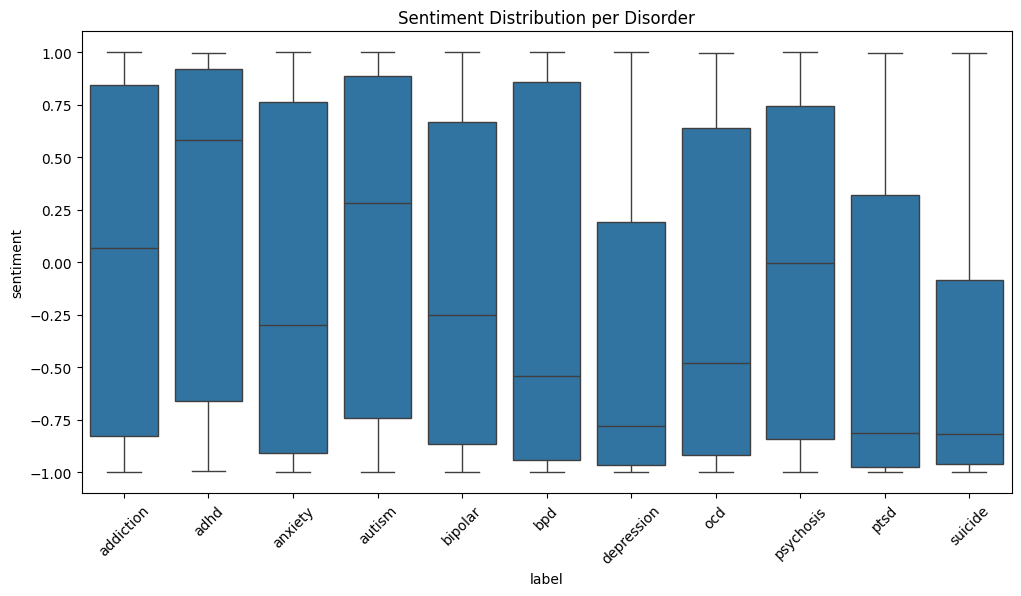

label
suicide      -0.470420
ptsd         -0.384452
depression   -0.375467
ocd          -0.186538
bpd          -0.132738
anxiety      -0.108844
bipolar      -0.107044
psychosis    -0.048932
addiction     0.015274
autism        0.099944
adhd          0.212086
Name: sentiment, dtype: float64


In [13]:
%pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['sentiment'] = df['combined_text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
plt.figure(figsize=(12,6))
sns.boxplot(x='label', y='sentiment', data=df)
plt.xticks(rotation=45)
plt.title("Sentiment Distribution per Disorder")
plt.show()

avg_sentiment = df.groupby('label')['sentiment'].mean().sort_values()
print(avg_sentiment)

In [14]:
for category in df['label'].unique():
    print(f"\nCategory: {category}")
    sample_posts = df[df['label']==category][['combined_text','sentiment']].sample(2, random_state=42)
    for i, row in sample_posts.iterrows():
        print(f"Text: {row['combined_text'][:200]}...")  
        print(f"Sentiment Score: {row['sentiment']:.3f}")
        print("-"*50)


Category: addiction
Text: My friend bought drug tests and asked me to do one before I hang out with her - I feel violated A friend of mine is really concerned about my addiction. I had a massive relapse after 2 months of being...
Sentiment Score: -0.663
--------------------------------------------------
Text: Need advice Hey everyone So I have an issue at the moment and basically I need help on how to handle it. I have a gf who I met in rehab 2 years ago when I had a substance abuse issue. It was a 13 mont...
Sentiment Score: 0.622
--------------------------------------------------

Category: adhd
Text: Validation and adhd So for context I'm prone to getting validation from my childhood as my parents always validate my feelings and emotions but obviously outside world doesn't work like that so I'm th...
Sentiment Score: -0.352
--------------------------------------------------
Text: Is it possible to get insurance to cover the cost of name brand Adderall? I (25F) take Adderall ER 20mg

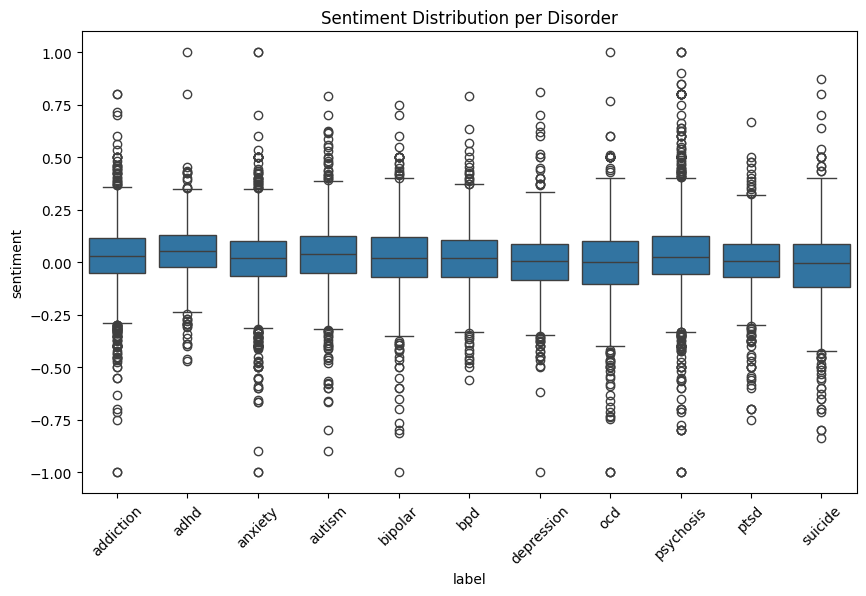

In [15]:
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

categories = df['label'].unique()
sentiment_by_category = [df[df['label']==cat]['sentiment'].values for cat in categories]
h_stat, p_value = kruskal(*sentiment_by_category)
print(f"Kruskal-Wallis test for sentiment differences: p-value = {p_value:.4f}")

Kruskal-Wallis test for sentiment differences: p-value = 0.0000


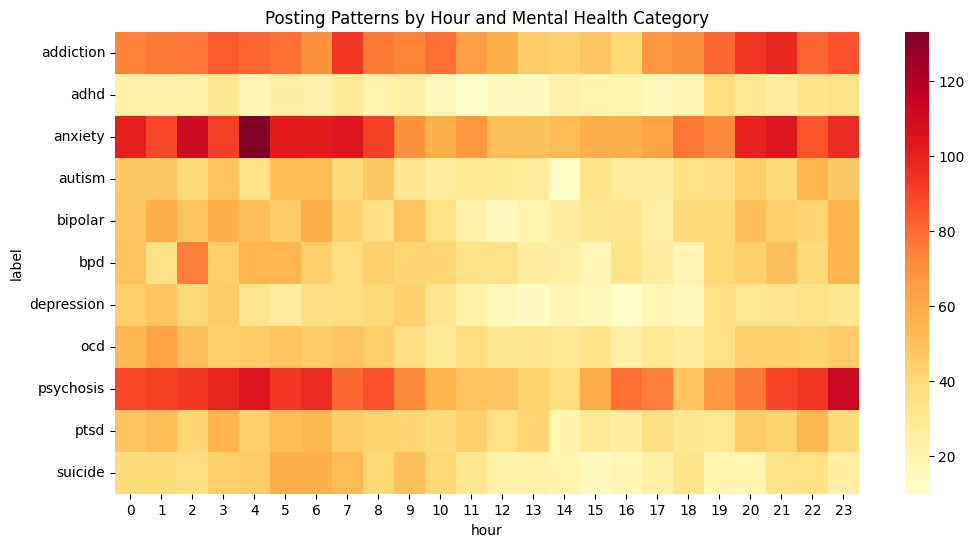

In [16]:
if 'created_ist' in df.columns:
    df['created_ist'] = pd.to_datetime(df['created_ist'])
    df['hour'] = df['created_ist'].dt.hour
    df['day_of_week'] = df['created_ist'].dt.day_name()
    
    plt.figure(figsize=(12,6))
    sns.heatmap(df.groupby(['label', 'hour']).size().unstack(), cmap='YlOrRd')
    plt.title("Posting Patterns by Hour and Mental Health Category")

   ---------------------------------------- 0.0/239.2 kB ? eta -:--:--
   ------ -------------------------------- 41.0/239.2 kB 653.6 kB/s eta 0:00:01
   --------------- ------------------------ 92.2/239.2 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 163.8/239.2 kB 1.2 MB/s eta 0:00:01
   ------------------------------------- -- 225.3/239.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 239.2/239.2 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 991.0 kB/s eta 0:00:03
   - -------------------------------------- 0.1/2.1 MB 1.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.2/2.1 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.1 MB 1.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.1 MB 1.3 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.1 MB 1.3 MB/s eta 0:00:02
   


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


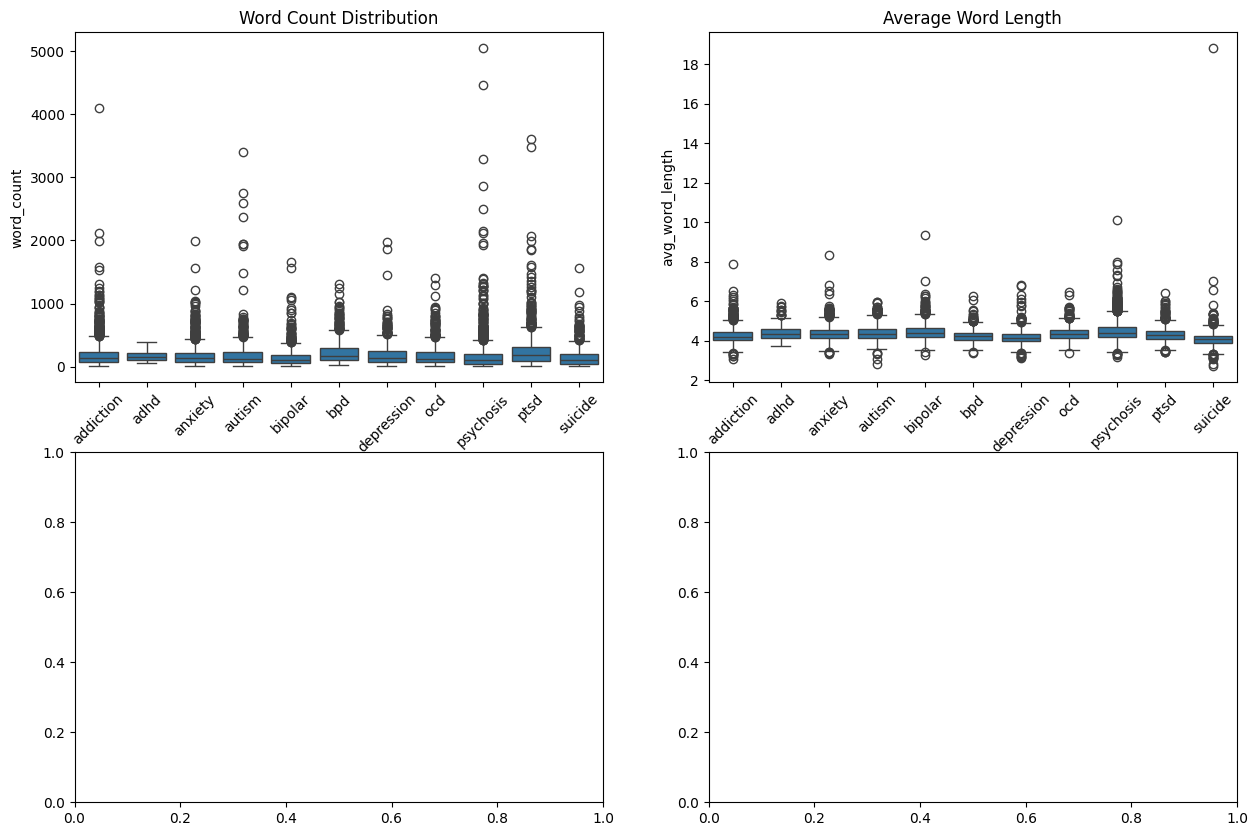

In [18]:
%pip install textstat
import nltk
from textstat import flesch_reading_ease

df['word_count'] = df['combined_text'].str.split().str.len()
df['sentence_count'] = df['combined_text'].str.count(r'[.!?]+')
df['avg_word_length'] = df['combined_text'].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()) if len(str(x).split()) > 0 else 0)

df['readability'] = df['combined_text'].apply(lambda x: flesch_reading_ease(str(x)) if len(str(x)) > 0 else 0)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(data=df, x='label', y='word_count', ax=axes[0,0])
axes[0,0].set_title('Word Count Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='label', y='avg_word_length', ax=axes[0,1]) 
axes[0,1].set_title('Average Word Length')
axes[0,1].tick_params(axis='x', rotation=45)


In [20]:
df['exclamation_count'] = df['combined_text'].str.count('!')
df['question_count'] = df['combined_text'].str.count('\?')
df['caps_ratio'] = df['combined_text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)

# Fixed line - use (?i) for case insensitive matching
df['first_person_pronouns'] = df['combined_text'].str.count(r'(?i)\b(i|me|my|myself|mine)\b')
df['first_person_ratio'] = df['first_person_pronouns'] / df['word_count']

# Plotting code remains the same
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='label', y='caps_ratio')
plt.title('Caps Usage by Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2) 
sns.boxplot(data=df, x='label', y='first_person_ratio')
plt.title('First Person Pronoun Usage')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='label', y='exclamation_count')
plt.title('Exclamation Usage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Class Imbalance Analysis:
Most represented class: anxiety (1988 samples)
Least represented class: adhd (553 samples)
Imbalance ratio (max/min): 3.59

Recommended stratified sample size per class: 553
This ensures balanced representation across all conditions.


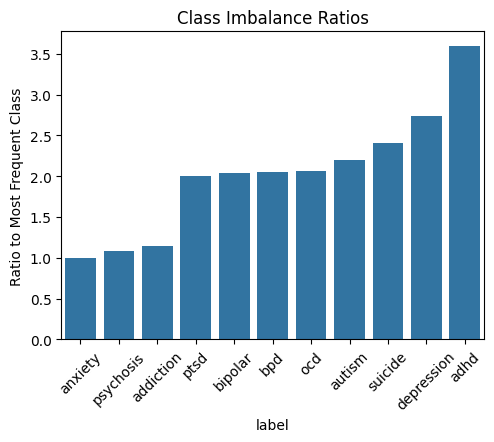

In [21]:
class_counts = df['label'].value_counts()
max_class = class_counts.max()
imbalance_ratios = max_class / class_counts

print("Class Imbalance Analysis:")
print(f"Most represented class: {class_counts.idxmax()} ({class_counts.max()} samples)")
print(f"Least represented class: {class_counts.idxmin()} ({class_counts.min()} samples)")
print(f"Imbalance ratio (max/min): {max_class/class_counts.min():.2f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=imbalance_ratios.index, y=imbalance_ratios.values)
plt.title('Class Imbalance Ratios')
plt.xticks(rotation=45)
plt.ylabel('Ratio to Most Frequent Class')

min_samples = class_counts.min()
print(f"\nRecommended stratified sample size per class: {min_samples}")
print("This ensures balanced representation across all conditions.")